<a href="https://colab.research.google.com/github/mirinai/BigdataPhysics_practice/blob/main/week_9_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVC(C=10, gamma=0.5)

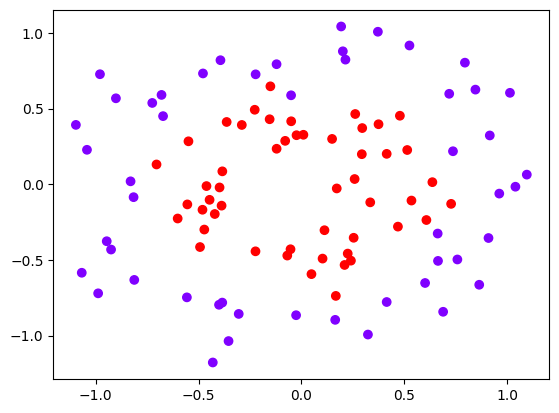

In [18]:
#clasification
#support vector machine
from sklearn.datasets import make_moons, make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X_circle, Y_circle = make_circles(noise=0.15, factor=0.5, random_state=1)
plt.scatter(X_circle[:,0], X_circle[:,1],c=Y_circle,cmap='rainbow')

model =SVC(kernel='rbf',C=10,gamma=0.5)
model.fit(X_circle, Y_circle)

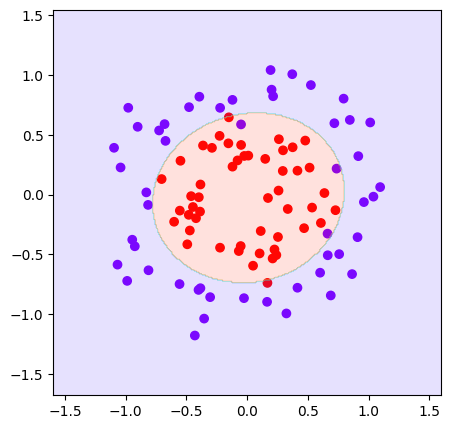

In [19]:
import numpy as np

def plot(model,X,Y):
  x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
  y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
  xrange = np.linspace(x_min, x_max, 300)
  yrange = np.linspace(y_min, y_max, 300)
  xx,yy = np.meshgrid(xrange,yrange)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  plt.figure(figsize=(5,5))
  plt.scatter(X[:,0],X[:,1], c=Y, cmap='rainbow', vmin=0, vmax=1)
  plt.contourf(xx,yy,Z, cmap='rainbow',alpha=0.15)
  plt.show()
plot(model, X_circle, Y_circle)

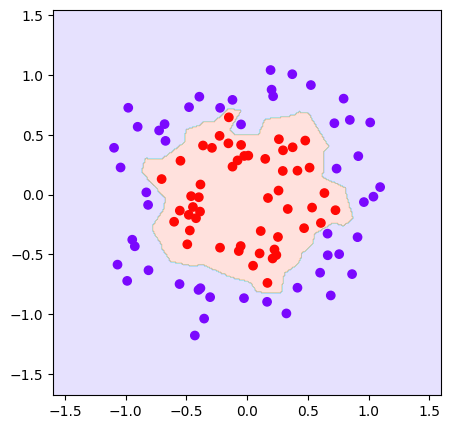

In [20]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN(n_neighbors=1)
model.fit(X_circle, Y_circle)
plot(model,X_circle, Y_circle)

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

0.7093023255813954


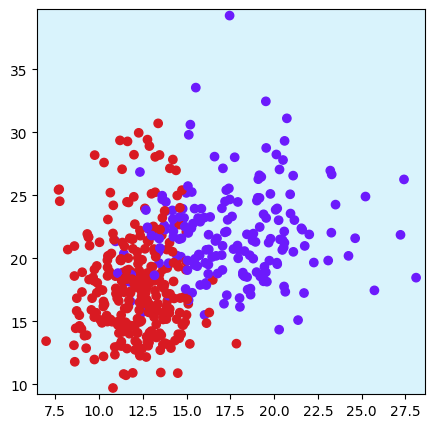


0.9069767441860465


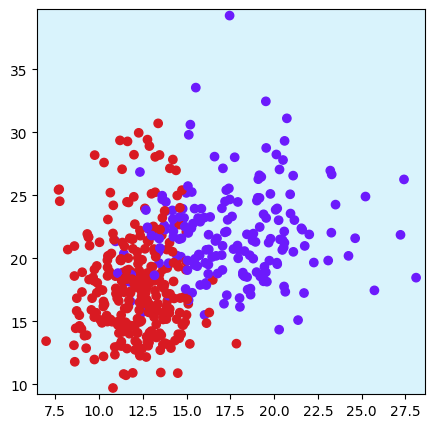

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target,test_size=0.15)

model_1 = SVC(kernel='rbf',C=10,gamma=0.5)
model_1.fit(X_train, Y_train)
print(model_1.score(X_test, Y_test))
plot(model,X_train, Y_train)
print()
model_2 = KNN(n_neighbors=2)
model_2.fit(X_train, Y_train)
print(model_2.score(X_test, Y_test))
plot(model,X_train, Y_train)

score는 모델이 테스트 데이터에서 얼마나 잘 수행되는지를 나타내는 지표입니다. 일반적으로 score는 정확도(accuracy)를 나타내며, 이는 모델이 올바르게 분류한 샘플의 비율입니다.

위 코드에서 model_1.score(X_test, Y_test)는 SVM(Support Vector Machine) 모델인 model_1이 테스트 데이터인 X_test와 Y_test에 대해 얼마나 정확하게 예측하는지를 나타냅니다.

유사하게, model_2.score(X_test, Y_test)는 K-최근접 이웃(KNN, K-Nearest Neighbors) 모델인 model_2가 테스트 데이터인 X_test와 Y_test에 대해 얼마나 정확하게 예측하는지를 나타냅니다.

그러므로 model_1.score(X_test, Y_test)와 model_2.score(X_test, Y_test)는 각각 SVM과 KNN 모델의 정확도를 나타냅니다.

--------------------------------
X_test와 Y_test는 모델의 성능을 평가하기 위해 사용되는 데이터입니다. 보통 기계 학습에서는 데이터를 훈련 세트와 테스트 세트로 분할합니다. 훈련 세트를 사용하여 모델을 학습하고, 테스트 세트를 사용하여 모델의 성능을 평가합니다.

X_test: 테스트 데이터의 특성(Feature)들로, 모델이 예측을 수행할 때 사용됩니다.
Y_test: 테스트 데이터의 실제 정답(라벨 또는 타겟)으로, 모델의 예측 결과와 비교하여 모델의 정확도를 계산하는 데 사용됩니다.
따라서 X_test는 모델에 입력되는 데이터이고, Y_test는 이에 대응하는 실제 정답(레이블 또는 타겟)입니다.

In [38]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.feature_names)
print()
iris.target_names


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']



array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

0.9473684210526315


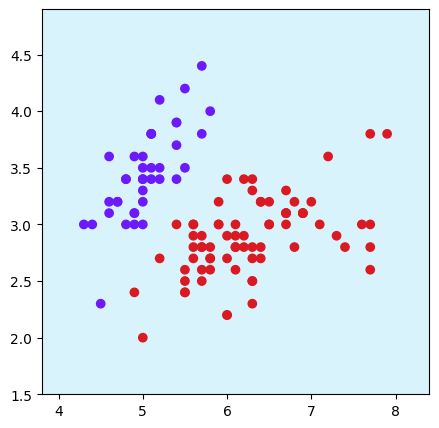


0.9473684210526315


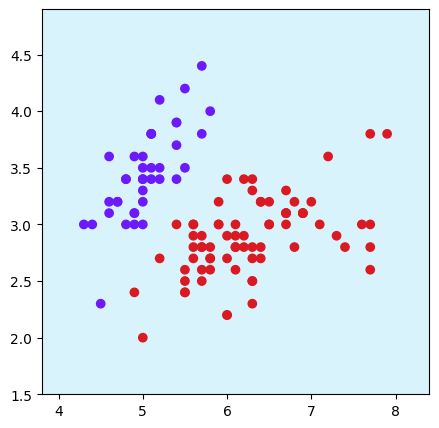

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target,test_size=0.25)

model_1 = SVC(kernel='rbf',C=10,gamma=0.5)
model_1.fit(X_train, Y_train)
print(model_1.score(X_test, Y_test))
plot(model,X_train, Y_train)
print()
model_2 = KNN(n_neighbors=2)
model_2.fit(X_train, Y_train)
print(model_2.score(X_test, Y_test))
plot(model,X_train, Y_train)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')